In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [2]:
#Mounting google drive
from google.colab import drive     
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd ./drive/MyDrive

/content/drive/MyDrive


In [4]:
cd ./Datasets 

/content/drive/MyDrive/Datasets


In [5]:
%ls

AfterPreprocessing.csv/  PreprocessedData.csv
CIC2019.csv              PreprocessedDataforIdentification.csv
dataset_sdn.csv          PreprocessedDatawithoutPortmapandUDPLag.csv
final_dataset.csv


In [6]:
path = "/content/drive/My Drive/Datasets/CIC2019.csv"
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,0,127779,2886729733,57177,3232248324,19971,6,188912,4,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
1,1,1,66687,2886729733,31536,3232248324,23,6,183,2,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
2,2,2,130695,2886729733,52312,3232248324,20889,6,168997,4,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
3,3,3,130921,2886729733,44853,3232248324,1274,6,151583,4,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
4,4,4,24890,2886729733,648,3232248324,35182,17,3,2,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
5,5,5,175919,3232248324,648,2886729733,35182,17,2,2,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,2
6,6,6,1226,2886729733,31239,3232248324,22,6,13830157,31,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
7,7,7,1422,2886729733,0,3232248324,0,0,119114825,42,...,1081010.1,1.525738e+06,3515440.0,99.0,10830452.5,4.836178e+06,17991661.0,6265169.0,1,2
8,8,8,1227,2886729733,31239,3232248324,22,6,1307,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
9,9,9,140863,3232248324,22,2886729733,31239,6,365131,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,2


In [7]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) #Starting data preprocessing 
#Data domensions

This Dataset has 1245798 rows and 75 columns


In [8]:
df.info()   #Data Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1245798 non-null  int64  
 1   Unnamed: 0.1                  1245798 non-null  int64  
 2   Unnamed: 0.1.1                1245798 non-null  int64  
 3    Source IP                    1245798 non-null  int64  
 4    Source Port                  1245798 non-null  int64  
 5    Destination IP               1245798 non-null  int64  
 6    Destination Port             1245798 non-null  int64  
 7    Protocol                     1245798 non-null  int64  
 8    Flow Duration                1245798 non-null  int64  
 9    Total Fwd Packets            1245798 non-null  int64  
 10   Total Backward Packets       1245798 non-null  int64  
 11  Total Length of Fwd Packets   1245798 non-null  float64
 12   Total Length of Bwd Packets

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', ' Source IP',
       ' Source Port', ' Destination IP', ' Destination Port', ' Protocol',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length M

In [10]:
df.describe()  #Descriptive statistics of dataset

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,...,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,6.228985e+05,6.228985e+05,1.074318e+05,2.891303e+09,2.302203e+04,3.166084e+09,3.186662e+04,1.486217e+01,2.202223e+06,3.375339e+00,...,1.085408e+04,9.885855e+03,2.130414e+04,4.560909e+03,8.783779e+05,1.914283e+05,1.043642e+06,7.206579e+05,9.624289e-01,3.339989e+00
std,3.596310e+05,3.596310e+05,1.089688e+05,1.506559e+08,2.447340e+04,4.198623e+08,1.958453e+04,4.363049e+00,1.051741e+07,1.920314e+02,...,1.717704e+05,1.473230e+05,2.918235e+05,1.374320e+05,4.404065e+06,1.175897e+06,5.018981e+06,3.964331e+06,1.901566e-01,1.832971e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.114492e+05,3.114492e+05,2.503600e+04,2.886730e+09,7.690000e+02,3.232248e+09,1.479500e+04,1.700000e+01,1.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,6.228985e+05,6.228985e+05,7.408800e+04,2.886730e+09,9.447000e+03,3.232248e+09,3.190300e+04,1.700000e+01,1.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,9.343478e+05,9.343478e+05,1.462510e+05,2.886730e+09,4.755075e+04,3.232248e+09,4.894600e+04,1.700000e+01,4.800000e+01,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
max,1.245797e+06,1.245797e+06,6.652080e+05,3.752141e+09,6.553400e+04,4.294967e+09,6.553500e+04,1.700000e+01,1.199975e+08,8.686600e+04,...,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.175692e+08,6.961402e+07,1.175692e+08,1.175692e+08,1.000000e+00,7.000000e+00


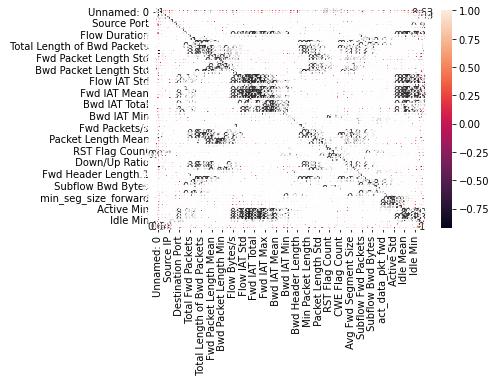

In [11]:
#creating heatmap for determining correlation
#take 10 columns at a time
import seaborn as sn
corr_mat=df.corr()
sn.heatmap(corr_mat, annot=True)

In [12]:
#Dropping off the unamed columns from features
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Unnamed: 0.1',axis=1) 
df=df.drop('Unnamed: 0.1.1',axis=1)                    

In [13]:
#removing all the 0.0 correlation values
df=df.drop(' Source IP',axis=1)
df=df.drop(' Flow Duration',axis=1)
df=df.drop(' Total Fwd Packets',axis=1)
df=df.drop(' Total Backward Packets',axis=1)
df=df.drop(' Total Length of Bwd Packets',axis=1)
df=df.drop(' Fwd Packet Length Std',axis=1)
df=df.drop(' Flow IAT Max',axis=1)
df=df.drop(' Flow IAT Min',axis=1)
df=df.drop('Fwd IAT Total',axis=1)
df=df.drop(' Fwd IAT Max',axis=1)
df=df.drop(' Fwd IAT Min',axis=1)
df=df.drop('Bwd IAT Total',axis=1)
df=df.drop(' Bwd IAT Mean',axis=1)
df=df.drop(' Bwd IAT Std',axis=1)
df=df.drop(' Bwd IAT Max',axis=1)
df=df.drop(' Bwd IAT Min',axis=1)
df=df.drop(' Fwd Header Length',axis=1)
df=df.drop(' Bwd Header Length',axis=1)
df=df.drop(' Bwd Packets/s',axis=1)
df=df.drop(' SYN Flag Count',axis=1)
df=df.drop(' Down/Up Ratio',axis=1)
df=df.drop(' Fwd Header Length.1',axis=1)
df=df.drop('Subflow Fwd Packets',axis=1)
df=df.drop(' Subflow Bwd Packets',axis=1)
df=df.drop(' Subflow Bwd Bytes',axis=1)
df=df.drop(' act_data_pkt_fwd',axis=1)
df=df.drop(' min_seg_size_forward',axis=1)
df=df.drop('Active Mean',axis=1)
df=df.drop(' Active Std',axis=1)
df=df.drop(' Active Max',axis=1)
df=df.drop(' Active Min',axis=1)
df=df.drop('Idle Mean',axis=1)
df=df.drop(' Idle Max',axis=1)
df=df.drop(' Idle Min',axis=1)
df=df.drop(' Packet Length Std',axis=1)

In [14]:
df.columns

Index([' Source Port', ' Destination IP', ' Destination Port', ' Protocol',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean',
       ' Fwd IAT Std', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Variance',
       ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' Idle Std', ' Inbound', 'Label'],
      dtype='object')

In [15]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) #Starting data preprocessing 
#Data domensions

This Dataset has 1245798 rows and 37 columns


In [16]:
#handling the categorical data
df = df.rename(columns={" Label": "Label"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  int64  
 1    Destination IP              1245798 non-null  int64  
 2    Destination Port            1245798 non-null  int64  
 3    Protocol                    1245798 non-null  int64  
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12  Flow Bytes/s                 1245753 non-n

In [17]:
#df.columns
df.Label.unique()
df['Label'] = df['Label'].replace('0', 'BENIGN')
df['Label'] = df['Label'].replace('1', 'NetBIOS')
df['Label'] = df['Label'].replace('2', 'LDAP')
df['Label'] = df['Label'].replace('3', 'MSSQL')
df['Label'] = df['Label'].replace('4', 'Portmap')
df['Label'] = df['Label'].replace('5', 'Syn')
df['Label'] = df['Label'].replace('6', 'UDP')
df['Label'] = df['Label'].replace('7', 'UDPLag')
df['Label'] = df['Label'].astype('str')
df.Label.unique()

array(['2', '1', '3', '6', '0', '4', '7', '5'], dtype=object)

In [18]:
df.Label.value_counts()

2    200000
1    200000
3    200000
6    200000
5    200000
4    186960
0     56965
7      1873
Name: Label, dtype: int64

In [19]:
BENIGN = df[df['Label'] == 'BENIGN']
NetBIOS = df[df['Label'] == 'NetBIOS']
MSSQL=df[df['Label'] == 'MSSQL']
UDP=df[df['Label'] == 'UDP']
LDAP=df[df['Label'] == 'LDAP']
Syn=df[df['Label'] == 'Syn']
Portmap=df[df['Label'] == 'Portmap']
UDPLag=df[df['Label'] == 'UDPLag']
print('Number of BENIGN:',round((len(BENIGN)/df.shape[0])*100,2),'%')
print('Number of NetBIOS:',round((len(NetBIOS)/df.shape[0])*100,2),'%')
print('Number of UDP:',round((len(UDP)/df.shape[0])*100,2),'%')
print('Number of UDPLag:',round((len(UDPLag)/df.shape[0])*100,2),'%')
print('Number of Portmap:',round((len(Portmap)/df.shape[0])*100,2),'%')
print('Number of Syn:',round((len(Syn)/df.shape[0])*100,2),'%')
print('Number of MSSQL:',round((len(MSSQL)/df.shape[0])*100,2),'%')
print('Number of LDAP:',round((len(LDAP)/df.shape[0])*100,2),'%')


Number of BENIGN: 0.0 %
Number of NetBIOS: 0.0 %
Number of UDP: 0.0 %
Number of UDPLag: 0.0 %
Number of Portmap: 0.0 %
Number of Syn: 0.0 %
Number of MSSQL: 0.0 %
Number of LDAP: 0.0 %


Text(0, 0.5, 'Frequency %')

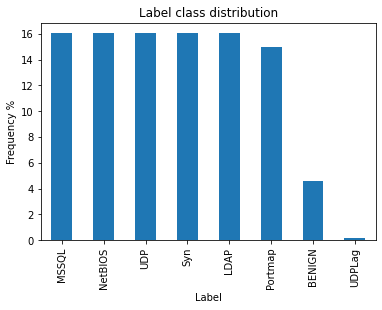

In [20]:
labels = ['MSSQL','NetBIOS','UDP' ,'Syn' ,'LDAP' ,'Portmap' , 'BENIGN','UDPLag']
classes = pd.value_counts(df['Label'], sort = True) / df['Label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(8), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

In [21]:
ips = df[' Destination IP']
print (ips)

0          3232248324
1          3232248324
2          3232248324
3          3232248324
4          3232248324
              ...    
1245793    3232248324
1245794    3232248324
1245795    3232248324
1245796    3232248324
1245797    3232248324
Name:  Destination IP, Length: 1245798, dtype: int64


In [22]:
df.columns

Index([' Source Port', ' Destination IP', ' Destination Port', ' Protocol',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean',
       ' Fwd IAT Std', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Variance',
       ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' Idle Std', ' Inbound', 'Label'],
      dtype='object')

In [23]:
df.head()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,57177,3232248324,19971,6,24.0,6.0,6.0,6.0,6.0,6.0,...,0,7.0,6.0,6.0,24,1024,0,0.0,1,2
1,31536,3232248324,23,6,12.0,6.0,6.0,6.0,6.0,6.0,...,0,7.5,6.0,6.0,12,24616,0,0.0,1,2
2,52312,3232248324,20889,6,24.0,6.0,6.0,6.0,6.0,6.0,...,0,7.0,6.0,6.0,24,1024,0,0.0,1,2
3,44853,3232248324,1274,6,24.0,6.0,6.0,6.0,6.0,6.0,...,0,7.0,6.0,6.0,24,1024,0,0.0,1,2
4,648,3232248324,35182,17,458.0,229.0,229.0,229.0,0.0,0.0,...,0,343.5,229.0,0.0,458,-1,-1,0.0,1,2


In [24]:
df.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,...,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,2.302203e+04,3.166084e+09,3.186662e+04,1.486217e+01,1.069863e+03,4.679689e+02,4.562818e+02,4.597351e+02,1.475077e+01,1.725317e+00,...,2.298206e-02,1.019186e-02,6.812989e+02,4.597351e+02,5.181360e+00,1.069863e+03,1.205828e+03,1.214158e+02,1.914283e+05,9.624289e-01
std,2.447340e+04,4.198623e+08,1.958453e+04,4.363049e+00,1.441733e+03,4.837410e+02,4.815043e+02,4.801285e+02,1.730104e+02,1.246812e+01,...,1.498463e-01,1.004390e-01,7.221197e+02,4.801285e+02,5.426732e+01,1.441733e+03,3.331159e+03,2.118996e+03,1.175897e+06,1.901566e-01
min,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,7.690000e+02,3.232248e+09,1.479500e+04,1.700000e+01,4.580000e+02,2.290000e+02,2.290000e+02,2.290000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.435000e+02,2.290000e+02,0.000000e+00,4.580000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
50%,9.447000e+03,3.232248e+09,3.190300e+04,1.700000e+01,4.940000e+02,2.470000e+02,2.470000e+02,2.470000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.705000e+02,2.470000e+02,0.000000e+00,4.940000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
75%,4.755075e+04,3.232248e+09,4.894600e+04,1.700000e+01,1.398000e+03,4.840000e+02,4.720000e+02,4.720000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,7.080000e+02,4.720000e+02,0.000000e+00,1.398000e+03,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
max,6.553400e+04,4.294967e+09,6.553500e+04,1.700000e+01,2.085240e+05,3.625000e+03,2.131000e+03,2.131000e+03,3.627000e+03,1.460000e+03,...,1.000000e+00,1.000000e+00,2.208000e+03,2.131000e+03,1.850769e+03,2.085240e+05,6.553500e+04,6.553500e+04,6.961402e+07,1.000000e+00


In [25]:
#df.columns
df.Label.unique()
df['Label'] = df['Label'].replace('BENIGN', '0')
df['Label'] = df['Label'].replace('NetBIOS', '1')
df['Label'] = df['Label'].replace('LDAP', '2')
df['Label'] = df['Label'].replace('MSSQL', '3')
df['Label'] = df['Label'].replace('Portmap', '4')
df['Label'] = df['Label'].replace('Syn', '5')
df['Label'] = df['Label'].replace('UDP', '6')
df['Label'] = df['Label'].replace('UDPLag', '7')
df['Label'] = df['Label'].astype('int')
df.Label.unique()

array([2, 1, 3, 6, 0, 4, 7, 5])

In [26]:
#Normalizing the data
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [27]:
normalized_df.head()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,1.395596,0.157586,-0.607399,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,...,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.19758,-0.731047
1,0.347887,0.157586,-1.625958,-2.031188,-0.733744,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,...,-0.101473,-0.933085,-0.945029,0.015085,-0.733744,7.027636,-0.057299,-0.162793,0.19758,-0.731047
2,1.196809,0.157586,-0.560525,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,...,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.19758,-0.731047
3,0.892029,0.157586,-1.562081,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,...,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.19758,-0.731047
4,-0.914218,0.157586,0.169285,0.489985,-0.424394,-0.494002,-0.472024,-0.480570,-0.085259,-0.138378,...,-0.101473,-0.467788,-0.480570,-0.095478,-0.424394,-0.362285,-0.057771,-0.162793,0.19758,-0.731047


In [28]:
normalized_df.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,...,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,1.054733e-12,1.373855e-13,-4.158871e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186770e-12,8.682086e-13,9.755238e-13,...,-3.022469e-13,2.738745e-12,-1.186770e-12,-8.253385e-13,1.063288e-13,1.868235e-12,1.265789e-13,-1.166239e-12,-2.792804e-12,-4.782956e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-1.822172e+00
25%,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-7.310472e-01
50%,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-1.854849e-01
75%,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,9.056397e-01
max,1.737069e+00,2.688699e+00,1.719132e+00,4.899846e-01,1.438922e+02,6.526284e+00,3.478096e+00,3.480870e+00,2.087880e+01,1.169603e+02,...,9.854818e+00,2.114194e+00,3.480870e+00,3.400920e+01,1.438922e+02,1.931135e+01,3.087008e+01,5.903799e+01,1.975798e-01,1.996764e+00


In [29]:
normalized_df.isnull().sum() #Count of null values in each feature

 Source Port                   0
 Destination IP                0
 Destination Port              0
 Protocol                      0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
 Bwd Packet Length Std         0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Fwd IAT Mean                  0
 Fwd IAT Std                   0
Fwd PSH Flags                  0
Fwd Packets/s                  0
 Min Packet Length             0
 Max Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
 RST Flag Count                0
 ACK Flag Count                0
 URG Flag Count                0
 CWE Flag Count                0
 Average Packet Size           0
 Avg Fwd Segment Size          0
 Avg Bwd Segment Size          0
 Subflow Fwd Bytes             0
Init_Win_b

In [30]:
#Fitting unique values from each column of features
print(normalized_df.apply(lambda col: col.unique())) 

 Source Port                   [1.3955958101410246, 0.34788678383352983, 1.19...
 Destination IP                [0.15758556942075008, -0.6653475895920182, 0.1...
 Destination Port              [-0.6073991496353963, -1.625958413952753, -0.5...
 Protocol                      [-2.0311882463058, 0.4899845510661981, -3.4063...
Total Length of Fwd Packets    [-0.7254207907132191, -0.7337441094492392, -0....
 Fwd Packet Length Max         [-0.9549922605226313, -0.49400173616032994, 0....
 Fwd Packet Length Min         [-0.9351562527047765, -0.47202435946987037, -0...
 Fwd Packet Length Mean        [-0.9450285741767762, -0.4805695650824725, -0....
Bwd Packet Length Max          [-0.0505794780308098, -0.08525948336493036, 5....
 Bwd Packet Length Min         [0.3428492031899198, -0.13837830265633044, 10....
 Bwd Packet Length Mean        [0.015085322357032947, -0.09547845799245676, 2...
 Bwd Packet Length Std         [-0.07687141363393221, 5.686272903449474, 4.89...
 Flow IAT Mean              

In [31]:
#df.columns
df.Label.unique()
df['Label'] = df['Label'].replace('0', 'BENIGN')
df['Label'] = df['Label'].replace('1', 'NetBIOS')
df['Label'] = df['Label'].replace('2', 'LDAP')
df['Label'] = df['Label'].replace('3', 'MSSQL')
df['Label'] = df['Label'].replace('4', 'Portmap')
df['Label'] = df['Label'].replace('5', 'Syn')
df['Label'] = df['Label'].replace('6', 'UDP')
df['Label'] = df['Label'].replace('7', 'UDPLag')
df['Label'] = df['Label'].astype('str')
df.Label.unique()

array(['2', '1', '3', '6', '0', '4', '7', '5'], dtype=object)

In [32]:
#The dataset Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 36 and they are : 
 [' Source Port', ' Destination IP', ' Destination Port', ' Protocol', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean', ' Fwd IAT Std', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Variance', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' Idle Std', ' Inbound']


In [33]:
#Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 1 and they are : 
 ['Label']


In [34]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 7 and they are : 
 [' Protocol', 'Fwd PSH Flags', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Inbound']


In [35]:
df[discrete_feature].head(10)

,Protocol,Fwd PSH Flags,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Inbound
0,6,0,0,1,0,0,1
1,6,0,0,1,0,0,1
2,6,0,0,1,0,0,1
3,6,0,0,1,0,0,1
4,17,0,0,0,0,0,1
5,17,0,0,0,0,0,0
6,6,0,0,1,0,0,1
7,0,0,0,0,0,0,1
8,6,1,1,0,1,1,1
9,6,0,0,0,1,1,0


In [36]:
#Continious Features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 29 and they are : 
 [' Source Port', ' Destination IP', ' Destination Port', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean', ' Fwd IAT Std', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Variance', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' Idle Std']


In [37]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

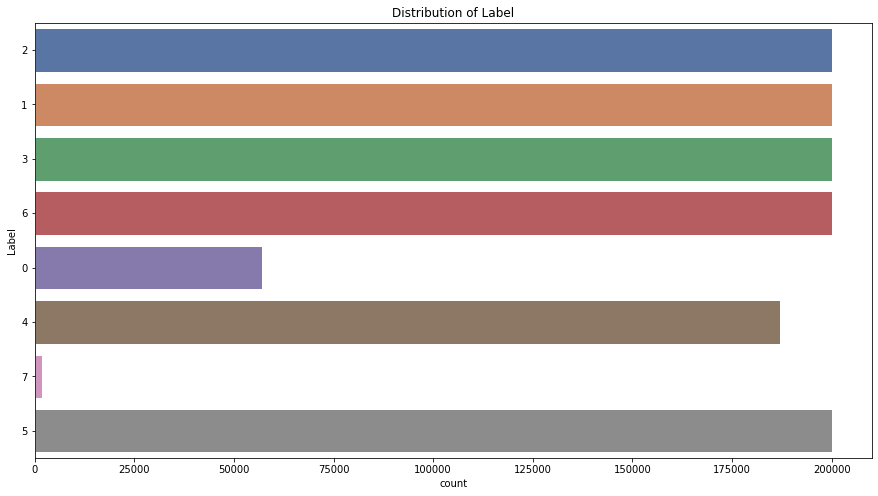

In [38]:
#Analyzing the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(15,8))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


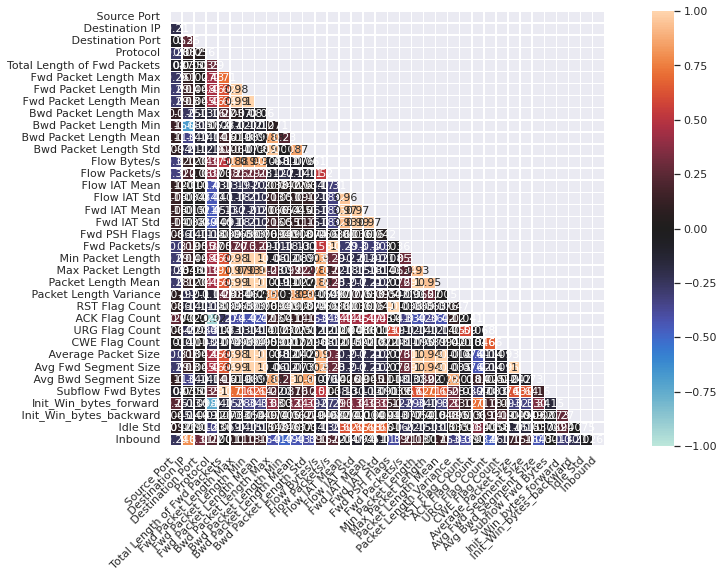

In [39]:
#Features Heat map
correlation_matrix = df.corr()
fig = plt.figure(figsize=(17,8))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

In [40]:
#calculate interquartile range 
q3, q1 = np.percentile(normalized_df, [75 ,25])
iqr = q3 - q1
print(q3,q1)

-0.04293748405174165 -0.32861435091468644


In [41]:
Upperbound=q1-1.5*iqr
Lowerbound=q3-1.5*iqr

In [42]:
print(Upperbound)

-0.7571296512091037


In [43]:
print(Lowerbound)

-0.47145278434615884


In [44]:
ds=normalized_df

In [45]:
ds.to_csv('PreprocessedData.csv')